# Some stay, but some never do...

Every year, companies spend billions of funding on employees - whether for training and development, benefits, or bonuses. However, some employees are more "proned to" leaving than others. The goal is to build a model that can predict whether an employee will stay or not, based on HR data obtained on Kaggle.

![ByeUrl](https://media.giphy.com/media/6v4VaKAwgmLoA/giphy.gif "bye")

##### The explanatory variable will include Sex, Age, Pay Rate, Marital Status, Race, and Performance Score.

## 1. Load Data

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [418]:
data = pd.read_csv('core_dataset.csv')

In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
Employee Name          301 non-null object
Employee Number        301 non-null float64
State                  301 non-null object
Zip                    301 non-null float64
DOB                    301 non-null object
Age                    301 non-null float64
Sex                    301 non-null object
MaritalDesc            301 non-null object
CitizenDesc            301 non-null object
Hispanic/Latino        301 non-null object
RaceDesc               301 non-null object
Date of Hire           301 non-null object
Date of Termination    103 non-null object
Reason For Term        301 non-null object
Employment Status      301 non-null object
Department             301 non-null object
Position               301 non-null object
Pay Rate               301 non-null float64
Manager Name           301 non-null object
Employee Source        301 non-null object
Performance Score      301 non-

#### Now take a sample of 5 datapoints to get an quick overview of data set.

In [420]:
data.sample(5)

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,Female,Single,US Citizen,No,...,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
84,"Carey, Michael",1.311063e+09,MA,1701.0,2/2/1983,34.0,Male,widowed,US Citizen,No,...,3/31/2014,NaN,N/A - still employed,Active,Production,Production Technician I,20.00,Kelley Spirea,MBTA ads,Fully Meets
132,"Jung, Judy",1.107027e+09,MA,2446.0,4/17/1986,31.0,Female,Married,US Citizen,No,...,1/10/2011,4/1/2016,unhappy,Voluntarily Terminated,Production,Production Technician I,21.00,Elijiah Gray,Monster.com,90-day meets
157,"O'hare, Lynn",1.206045e+09,MA,2152.0,9/30/1980,37.0,Female,widowed,US Citizen,No,...,3/31/2014,5/1/2016,performance,Terminated for Cause,Production,Production Technician I,18.50,Kissy Sullivan,Professional Society,PIP
118,"Gonzalez, Cayo",1.411071e+09,MA,2108.0,9/29/1969,48.0,Male,Divorced,US Citizen,No,...,7/11/2011,NaN,N/A - still employed,Active,Production,Production Technician I,16.00,Brannon Miller,Diversity Job Fair,Exceeds


#### Let's explore some categorical variables:

In [408]:
print("Marital status categories: \n" + str(data.MaritalDesc.value_counts()))
print("\nRace status categories: \n" + str(data.RaceDesc.value_counts()))
print("\nReason for termination categories: \n" + str(data['Reason For Term'].value_counts()))
print("\nEmployment status categories: \n" + str(data['Employment Status'].value_counts()))
print("\nPerformance score status: \n" + str(data['Performance Score'].value_counts()))

Marital status categories: 
Single       127
Married      119
Divorced      30
Separated     14
widowed       11
Name: MaritalDesc, dtype: int64

Race status categories: 
White                               190
Black or African American            54
Asian                                31
Two or more races                    18
Hispanic                              4
American Indian or Alaska Native      4
Name: RaceDesc, dtype: int64

Reason for termination categories: 
N/A - still employed                188
Another position                     20
unhappy                              14
N/A - Has not started yet            11
more money                           11
career change                         9
hours                                 9
attendance                            7
return to school                      5
relocation out of area                5
military                              4
performance                           4
retiring                              4
mat

#### Drop employees who have not started yet and employees whose performance haven't been reviewed from the data set.

In [409]:
data = data[data['Employment Status'] != "Future Start"]
print("\nEmployment status categories: \n" + str(data['Employment Status'].value_counts()))
data = data[data['Performance Score'] != "N/A- too early to review"]
print("\nPerformance score status: \n" + str(data['Performance Score'].value_counts()))


Employment status categories: 
Active                    174
Voluntarily Terminated     88
Terminated for Cause       14
Leave of Absence           14
Name: Employment Status, dtype: int64

Performance score status: 
Fully Meets          172
90-day meets          31
Exceeds               26
Needs Improvement     15
Exceptional            9
PIP                    9
Name: Performance Score, dtype: int64


#### Further cleaning...

In [410]:
data.loc[data['Sex'] == "male", 'Sex'] = "Male"

## 2. Explore the data set

#### Sex vs Performance Score

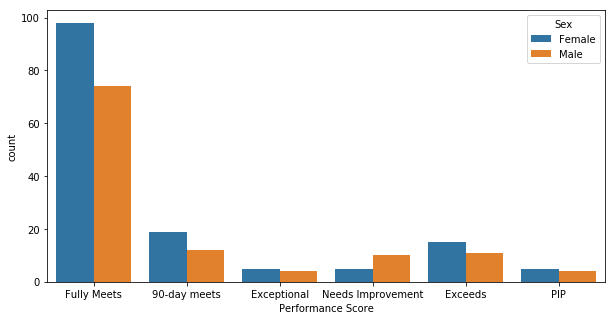

In [411]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Performance Score', hue='Sex', data=data)
plt.show()

Males generally have poorer performance scores - is this just bad luck or is it a pattern...?

![surprised](https://media.giphy.com/media/XfT1Xb2O2ShHy/giphy.gif "surprised")

#### Age vs Pay rate

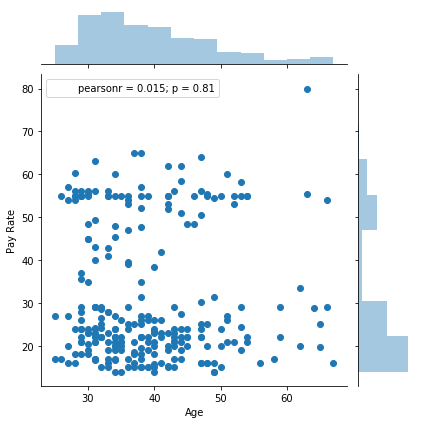

In [412]:
plt.figure(figsize=(10, 5))
sns.jointplot(x='Age',y='Pay Rate',data=data)
plt.show()

No clear relationship between Age and Pay Rate exists - working for longer years are 'pretty' futile.

![aging](https://media.giphy.com/media/Nt8Q1I8rlfzZS/giphy.gif "aged")

#### Sex and Pay Rate

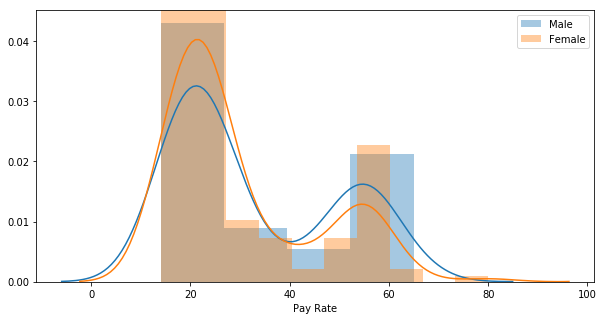

In [413]:
plt.figure(figsize=(10, 5))
sns.distplot(data[data['Sex'] == "Male"]['Pay Rate'], label='Male')
sns.distplot(data[data['Sex'] == "Female"]['Pay Rate'], label='Female')
plt.legend()
plt.show()

Females have higher pay rates comparing to men when they are younger, but lower pay rates when they get older.

![WOW](https://media.giphy.com/media/2cizFyS72nkQg/giphy.gif "wow")

## 3. Build Models

Some data processing...

In [414]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data = pd.get_dummies(data, columns=['RaceDesc'], drop_first=True)
data = pd.get_dummies(data, columns=['Performance Score'], drop_first=True)
data = pd.get_dummies(data, columns=['MaritalDesc'], drop_first=True)
data.loc[data['Employment Status'] == "Active", 'Employment'] = 1
data.loc[data['Employment Status'] != "Active", 'Employment'] = 0
data.loc[data['Employment Status'] == "Leave of Absence", 'Employment'] = 1

print(data.info())
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 301
Data columns (total 33 columns):
Employee Name                          262 non-null object
Employee Number                        262 non-null float64
State                                  262 non-null object
Zip                                    262 non-null float64
DOB                                    262 non-null object
Age                                    262 non-null float64
CitizenDesc                            262 non-null object
Hispanic/Latino                        262 non-null object
Date of Hire                           262 non-null object
Date of Termination                    89 non-null object
Reason For Term                        262 non-null object
Employment Status                      262 non-null object
Department                             262 non-null object
Position                               262 non-null object
Pay Rate                               262 non-null float64
Manager

,Employee Name,Employee Number,State,Zip,DOB,Age,CitizenDesc,Hispanic/Latino,Date of Hire,Date of Termination,...,Performance Score_Exceeds,Performance Score_Exceptional,Performance Score_Fully Meets,Performance Score_Needs Improvement,Performance Score_PIP,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_widowed,Employment
83,"Bugali, Josephine",1.408070e+09,MA,2043.0,10/30/1969,48.0,US Citizen,No,11/11/2013,NaN,...,0,0,1,0,0,0,1,0,0,1.0
28,"Monroe, Peter",1.011023e+09,MA,2134.0,10/5/1986,31.0,Eligible NonCitizen,Yes,2/15/2012,NaN,...,0,0,0,1,0,1,0,0,0,1.0
244,"Oliver, Brooke",1.001857e+09,MA,2492.0,2/11/1952,65.0,US Citizen,No,5/14/2012,8/19/2013,...,0,0,0,0,0,1,0,0,0,0.0
128,"Jackson, Maryellen",1.201031e+09,MA,2081.0,9/11/1972,45.0,US Citizen,No,11/5/2012,NaN,...,0,0,1,0,0,0,1,0,0,1.0
229,"Johnston, Yen",1.306058e+09,MA,2128.0,9/8/1969,48.0,US Citizen,No,7/7/2014,NaN,...,0,1,0,0,0,0,0,1,0,1.0


#### Set values to X and y.

In [415]:
y = data.iloc[:, -1].values
X = data.iloc[:, [5, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]].values

print(sum(np.isnan(y)))
print(sum(np.isnan(X)))

0
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### X data has some missing values, which we will fill by using mean of repective column.

In [357]:
col_mean = np.nanmean(X, axis=0)
inds = np.where(np.isnan(X))
X[inds] = np.take(col_mean, inds[1])
sum(np.isnan(X))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Split data into testing and training sets.

In [358]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### 3.1 Logistic Model

In [359]:
from sklearn.linear_model import LogisticRegression

In [360]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [361]:
predictions = logmodel.predict(X_test)

In [362]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.636363636364


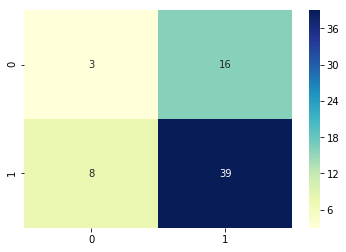

In [363]:
sns.heatmap(confusion_matrix(y_test, predictions), cmap="YlGnBu", annot=True, fmt="d")

### 3.2 Random Forest Model

In [364]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [365]:
predictions_rfc = rfc.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, predictions_rfc))

Accuracy score:  0.69696969697


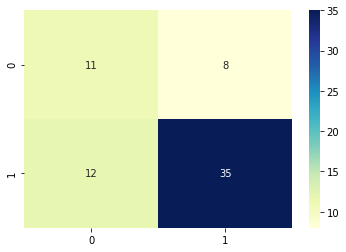

In [366]:
sns.heatmap(confusion_matrix(y_test, predictions_rfc), cmap="YlGnBu", annot=True, fmt="d")

### 3.3 Decision Tree Model

In [367]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [368]:
predictions_dtc = dtc.predict(X_test)
print("Accuracy score " + str(accuracy_score(y_test, predictions_dtc)))

Accuracy score 0.681818181818


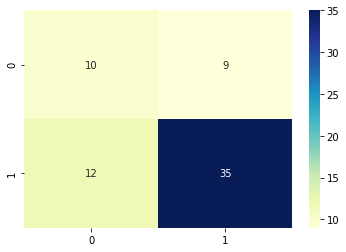

In [373]:
sns.heatmap(confusion_matrix(y_test, predictions_dtc), cmap="YlGnBu", annot=True, fmt="d")

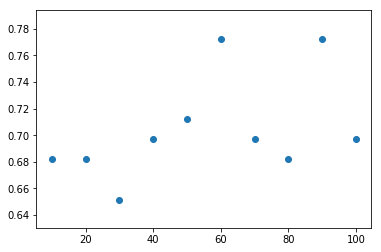

In [370]:
n = [10,20,30,40,50,60,70,80,90,100]

result = []

for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test, predictions))
    
plt.scatter(n, result)

## 4. Conclusion

None of the model really works fantastically - accuracy scores are around 60 - 70% for all 3 models, which are pretty OK for simple models with only 6 explanatory variables and around 200 observations. Random Forest model is the one that has the highest accuracy score, followed by Decision Tree and Logistic Model.

One way to increase accuracy scores is to include more explanatory variables into the model. However, caution should be taken as some additional variables may not be quite relevant to our dependent variable.

![OK](https://media.giphy.com/media/jedneOuAEkcgg/giphy.gif "ok")